# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS




1. Number of people by gender 
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [32]:
data=pd.read_csv('PoliceKillingsUS.csv')
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 1: Plot number of people by gender

In [33]:
data.groupby('gender')['id'].nunique()
people_total=data.groupby('gender')['id'].nunique()
people_total

gender
F     107
M    2428
Name: id, dtype: int64

In [34]:
people_total.values

array([ 107, 2428])

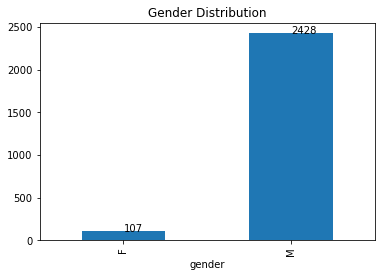

In [35]:
#with pandas

people_total.plot(kind='bar',stacked=True)

plt.title('Gender Distribution')

for index,value in enumerate(people_total):
    plt.text(x=index , y =value , s=str(value))
    

plt.show()



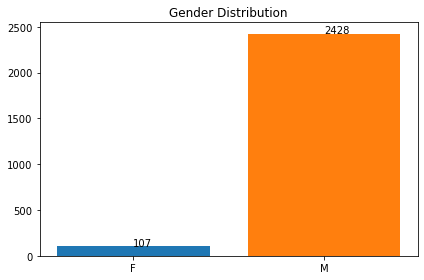

In [36]:
# with matplotlib  -Function method

Female=people_total['F']
Male=people_total['M']

plt.bar('F',Female)
plt.bar('M',Male)



for index,value in enumerate(people_total):
    plt.text(x=index , y=value , s=str(value))
    
plt.title('Gender Distribution')
plt.tight_layout()


    
plt.show()



In [37]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 2: Plot 7 most common kill weapons

In [38]:
armed_top7=data['armed'].value_counts(ascending=False).head(7)
armed_top7

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [2]:
# with pandas


armed_top7=data['armed'].value_counts(ascending=False).head(7)
armed_top7.plot(kind='bar',round,figsize=(8,5))

plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-2-daeb069813df>, line 5)

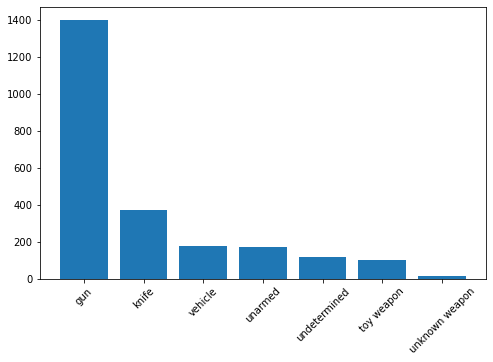

In [40]:
# with matplotlib

armed_top7=data['armed'].value_counts(ascending=False).head(7)


fig, ax=plt.subplots(figsize=(8,5))
ax.bar(x=armed_top7.index, height=armed_top7.values)

ax.set_xticklabels(armed_top7.index, rotation=45)
#plt.tight_layout()

plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [41]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [42]:
data['age_cat']=data['age'].apply(lambda  x: 'above25' if x>25 else 'below25' )
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [43]:
age_cat=data['age_cat'].value_counts()
age_cat

above25    1905
below25     630
Name: age_cat, dtype: int64

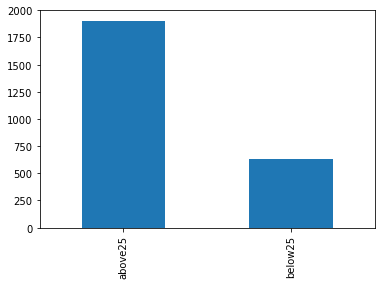

In [44]:
# with pandas
age_cat=data['age_cat'].value_counts()

age_cat.plot(kind='bar')

plt.show()

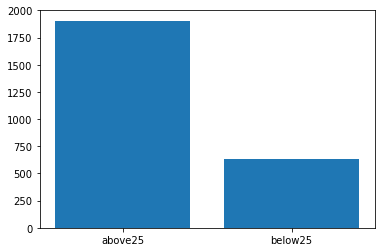

In [45]:
# with matplotlib
age_cat=data['age_cat'].value_counts()

fig, ax=plt.subplots()
ax.bar(x=age_cat.index,height=age_cat.values)

plt.show()


## 4: Plot number of killed poeple by race

In [46]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [47]:
race=data['race'].value_counts()
race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

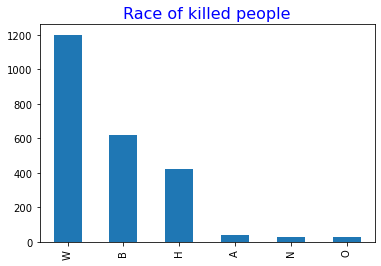

In [48]:
# with pandas

ax=race.plot.bar()
ax.set_title('Race of killed people',fontsize=16,color='blue');

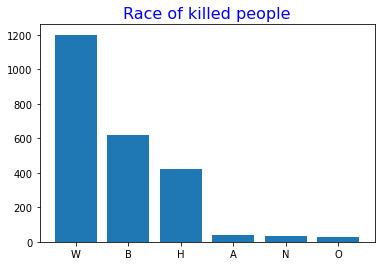

In [49]:
# with matplotlib

fig, ax=plt.subplots()
ax.bar(x=race.index, height=race.values)

ax.set_title('Race of killed people',fontsize=16,color='blue');

## 5: Killed People According to Races (Pie Chart)

In [50]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [51]:
race_value=data['race'].values
race_value

array(['A', 'W', 'H', ..., nan, 'B', 'B'], dtype=object)

In [52]:
race_total=data['race'].value_counts()
race_total

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [53]:
data.shape

(2535, 15)

In [54]:
data['race'].isnull().sum()

195

In [55]:
data.dropna(inplace=True)

In [56]:
data.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [57]:
data['race'].values

array(['A', 'W', 'H', ..., 'B', 'B', 'B'], dtype=object)

In [58]:
race_values=data['race'].value_counts(dropna=True)

In [59]:
race_values.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [60]:
race_values.values

array([1168,  592,  401,   36,   29,   28])

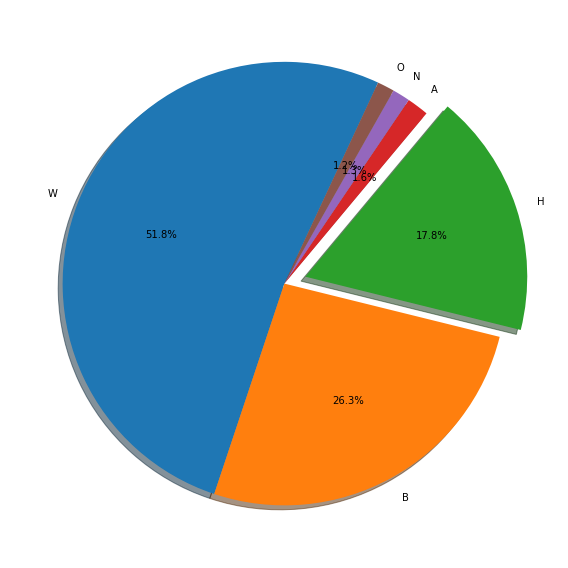

In [61]:
# matplotlib

fig,ax=plt.subplots(figsize=(10,8))
ax.pie(race_values.values,
       labels=race_values.index,
       explode=[0,0,0.1,0,0,0],
       shadow=True,
       startangle=65,
       autopct='%1.1f%%')

plt.tight_layout();



## 6: Most common 15 Name or Surname of killed people 

In [62]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [63]:
data.shape

(2254, 15)

In [64]:
data['name'].value_counts()

Eric Harris                 2
Michael Brown               2
Daquan Antonio Westbrook    2
Michael Johnson             2
Brandon Jones               2
                           ..
Steven Wickert              1
Patrick Stephen Pippin      1
Joel Dixon Smith            1
Christian Bowman            1
Adam Jo Klimek              1
Name: name, Length: 2249, dtype: int64

In [65]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
data[data['name']=='TK TK']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
2465,2748,TK TK,05/07/17,shot,undetermined,24.0,M,H,Vista,CA,False,undetermined,Foot,False,below25


In [66]:
data.drop(labels=2465, inplace=True)

In [67]:
data.shape

(2253, 15)

In [68]:
pairs=data['name'].str.split()

In [69]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

In [70]:
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

shape

In [71]:
pairs.shape

(2253,)

In [72]:
pairs[0]

['Tim', 'Elliot']

In [73]:
pairs[0][0]

'Tim'

In [74]:
name_surname=[]
for i in pairs:
    for k in i:
        name_surname.append(k)

In [75]:
len(name_surname)

5339

In [76]:
x=Counter(name_surname)

In [77]:
x

Counter({'Tim': 3,
         'Elliot': 1,
         'Lewis': 7,
         'Lee': 37,
         'Lembke': 1,
         'John': 36,
         'Paul': 16,
         'Quintero': 2,
         'Matthew': 22,
         'Hoffman': 2,
         'Michael': 82,
         'Rodriguez': 13,
         'Kenneth': 17,
         'Joe': 9,
         'Brown': 17,
         'Arnold': 2,
         'Buck': 3,
         'Brock': 2,
         'Nichols': 3,
         'Autumn': 1,
         'Steele': 1,
         'Leslie': 2,
         'Sapp': 2,
         'III': 9,
         'Patrick': 13,
         'Wetter': 1,
         'Ron': 2,
         'Sneed': 1,
         'Hashim': 1,
         'Hanif': 1,
         'Ibn': 1,
         'Abdul-Rasheed': 1,
         'Nicholas': 13,
         'Ryan': 16,
         'Brickman': 1,
         'Omarr': 1,
         'Julian': 3,
         'Maximillian': 1,
         'Jackson': 9,
         'Loren': 3,
         'Simpson': 4,
         'James': 47,
         'Dudley': 1,
         'Barker': 2,
         'Artago': 1,
     

In [78]:
y=x.most_common(15)
type(y)

list

In [79]:
z=pd.DataFrame(data=y, columns=['name_or_surname','number_repetitions'])
z

,name_or_surname,number_repetitions
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,Lee,37
8,John,36
9,Christopher,35


<AxesSubplot:>

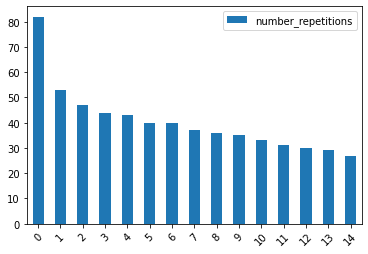

In [80]:
# with pandas

z.plot(rot=45, kind='bar')

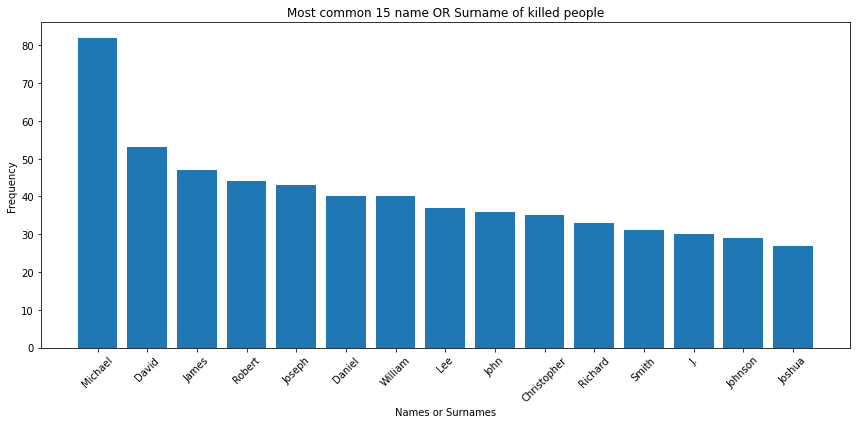

In [81]:
# with matplotlib
fig, ax=plt.subplots(figsize=(12,6))
ax.bar(x=z['name_or_surname'], height=z['number_repetitions'])

ax.set_xlabel('Names or Surnames')
ax.set_ylabel('Frequency')
ax.set_title('Most common 15 name OR Surname of killed people')
ax.set_xticklabels(z['name_or_surname'],rotation=45)

plt.tight_layout()

In [3]:
example = "snow world"
print("%s" % example[4:7])

 wo
